### Import

In [1]:
import os
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import spectral.io.aviris as aviris
import colour
from PIL import Image
from scipy.stats import multivariate_normal as mnorm
from scipy import ndimage
from matplotlib import cm
from mpl_toolkits import mplot3d
from skimage import io, color
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

### Fonts

In [2]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Alternative Comparisons

In [3]:
LABleft = np.zeros((1,3))
LABright = np.zeros((1,3))
RGBleft = np.zeros((1,3))
RGBright = np.zeros((1,3))

# RGBleft[0,0] = 0.2
# RGBleft[0,1] = 0.2
# RGBleft[0,2] = 0.9
# RGBright[0,0] = 1.0
# RGBright[0,1] = 0.8
# RGBright[0,2] = 1.0

# RGBleft[0,0] = 0.0
# RGBleft[0,1] = 0.0
# RGBleft[0,2] = 1.0
# RGBright[0,0] = 1.0
# RGBright[0,1] = 0.5
# RGBright[0,2] = 0.2

### Example Patches

115.53756431
36.1324051455


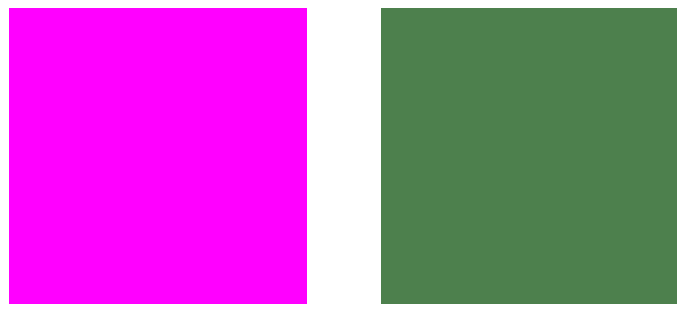

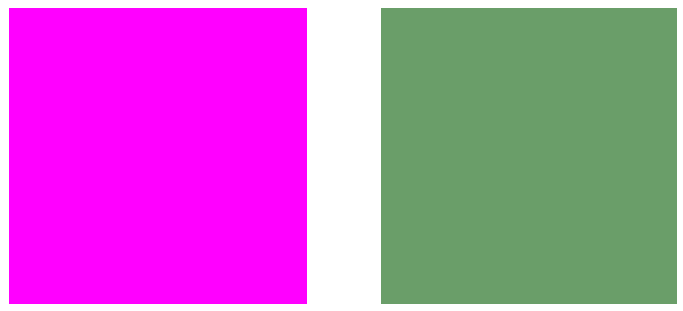

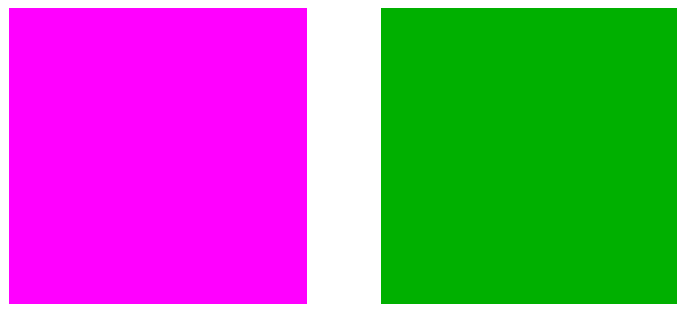

In [14]:
#Create the RGB patches and convert to LAB
RGBleft[0,0] = 1.0
RGBleft[0,1] = 0.0
RGBleft[0,2] = 1.0
RGBright[0,0] = 0.3
RGBright[0,1] = 0.5
RGBright[0,2] = 0.3
LABleft = color.rgb2lab(RGBleft)
LABright = color.rgb2lab(RGBright)


fig, ax = plt.subplots(figsize=(12,6))
background = np.zeros((80,180,3)).astype('uint8') + 255
rect_left = patches.Rectangle((0, 0), 80, 80, linewidth=0, facecolor=RGBleft)
rect_right = patches.Rectangle((100, 0), 80, 80, linewidth=0, facecolor=RGBright)
ax.add_patch(rect_left);
ax.add_patch(rect_right);
ax.imshow(background)
plt.axis('off');
plt.savefig('../../assets/figures/019/patch1.png', dpi=300,bbox_inches="tight")


LABright[0,0] = LABleft[0,0]
RGBleft = color.lab2rgb(LABleft)
RGBright = color.lab2rgb(LABright)
fig, ax = plt.subplots(figsize=(12,6))
background = np.zeros((80,180,3)).astype('uint8') + 255
rect_left = patches.Rectangle((0, 0), 80, 80, linewidth=0, facecolor=RGBleft)
rect_right = patches.Rectangle((100, 0), 80, 80, linewidth=0, facecolor=RGBright)
ax.add_patch(rect_left);
ax.add_patch(rect_right);
ax.imshow(background)
plt.axis('off');
plt.savefig('../../assets/figures/019/patch2.png', dpi=300,bbox_inches="tight")


sat1 = np.sqrt(LABleft[0,1]**2 + LABleft[0,2]**2)
sat2 = np.sqrt(LABright[0,1]**2 + LABright[0,2]**2)
print(sat1)
print(sat2)
LABright[0,1] = LABright[0,1] * (sat1/sat2)
LABright[0,2] = LABright[0,2] * (sat1/sat2)
sat1 = np.sqrt(LABleft[0,1]**2 + LABleft[0,2]**2)
sat2 = np.sqrt(LABright[0,1]**2 + LABright[0,2]**2)

RGBleft = color.lab2rgb(LABleft)
RGBright = color.lab2rgb(LABright)
fig, ax = plt.subplots(figsize=(12,6))
background = np.zeros((80,180,3)).astype('uint8') + 255
rect_left = patches.Rectangle((0, 0), 80, 80, linewidth=0, facecolor=RGBleft)
rect_right = patches.Rectangle((100, 0), 80, 80, linewidth=0, facecolor=RGBright)
ax.add_patch(rect_left);
ax.add_patch(rect_right);
ax.imshow(background)
plt.axis('off');
plt.savefig('../../assets/figures/019/patch3.png', dpi=300,bbox_inches="tight")